<a href="https://colab.research.google.com/github/jhesly12/Challenge3_TelecomX_parte2/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparacion de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
datos = pd.read_csv("/content/df_final.csv")

In [ ]:
datos.sample(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
3056,4254-QPEDE,0,Female,0,1,0,52,0,0,DSL,...,1,1,1,1,Two year,0,Credit card (automatic),66.25,3330.10,2.18
3980,5443-SCMKX,0,Female,0,1,0,58,1,1,Fiber optic,...,1,0,0,1,One year,1,Electronic check,94.30,5610.15,3.10
3353,4660-IRIBM,0,Male,0,1,1,18,1,0,Fiber optic,...,1,0,1,0,Month-to-month,1,Mailed check,87.90,1500.50,2.89
2161,3022-BEXHZ,0,Male,0,1,1,67,1,1,Fiber optic,...,1,1,1,1,Two year,1,Bank transfer (automatic),111.20,7530.80,3.65
6127,8387-MOJJT,1,Female,0,1,1,42,1,0,Fiber optic,...,0,0,1,0,Month-to-month,1,Credit card (automatic),77.95,3384.00,2.56


In [ ]:
datos.gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
datos['gender'] = datos['gender'].map({'Male': 1, 'Female': 0})

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   int64  
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


#  Eliminar columnas irrelevantes

In [ ]:
datos=datos.drop(columns='customerID')
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

In [ ]:
xIn=datos.drop(columns='Churn')
yOut=datos['Churn']

#Verificación de la Proporción de Cancelación (Churn)

In [ ]:
umbral = 0.70
columnas_a_eliminar = []

for columna in datos.columns:
    if datos[columna].nunique() <= 2 or datos[columna].dtype == 'object':
        frecuencia_max = datos[columna].value_counts(normalize=True).max()
        if frecuencia_max > umbral:
            columnas_a_eliminar.append(columna)
            print(f"Columna '{columna}' tiene {frecuencia_max*100:.2f}% en una categoría.")
if columnas_a_eliminar:
    print(f"\nColumnas a eliminar por desbalance (>{umbral*100}% en una categoría):")
    print(columnas_a_eliminar)
else:
    print(f"No se encontraron columnas con desbalance >{umbral*100}%.")

Columna 'Churn' tiene 74.28% en una categoría.
Columna 'SeniorCitizen' tiene 83.73% en una categoría.
Columna 'PhoneService' tiene 90.27% en una categoría.
Columna 'OnlineSecurity' tiene 71.40% en una categoría.
Columna 'TechSupport' tiene 71.05% en una categoría.

Columnas a eliminar por desbalance (>70.0% en una categoría):
['Churn', 'SeniorCitizen', 'PhoneService', 'OnlineSecurity', 'TechSupport']


In [ ]:
#Datos irrelevantes para el modelo <90%
datos=datos.drop(columns='PhoneService')
datos.columns

Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')

# Encoding

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   int64  
 1   gender            7267 non-null   int64  
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   int64  
 4   Dependents        7267 non-null   int64  
 5   tenure            7267 non-null   int64  
 6   MultipleLines     7267 non-null   int64  
 7   InternetService   7267 non-null   object 
 8   OnlineSecurity    7267 non-null   int64  
 9   OnlineBackup      7267 non-null   int64  
 10  DeviceProtection  7267 non-null   int64  
 11  TechSupport       7267 non-null   int64  
 12  StreamingTV       7267 non-null   int64  
 13  StreamingMovies   7267 non-null   int64  
 14  Contract          7267 non-null   object 
 15  PaperlessBilling  7267 non-null   int64  
 16  PaymentMethod     7267 non-null   object 


In [ ]:
categoricas = datos.select_dtypes(include=['object']).columns.tolist()
print("Variables categóricas:", categoricas)

Variables categóricas: ['InternetService', 'Contract', 'PaymentMethod']


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

columnas=xIn.columns
one_hot_encoder = make_column_transformer(
    (OneHotEncoder(drop='if_binary'),categoricas),
    remainder='passthrough',
    sparse_threshold=0
)
x=one_hot_encoder.fit_transform(xIn)
one_hot_encoder.get_feature_names_out(columnas)
xIn=pd.DataFrame(x, columns=one_hot_encoder.get_feature_names_out(columnas))


In [ ]:
xIn.columns

Index(['onehotencoder__InternetService_DSL',
       'onehotencoder__InternetService_Fiber optic',
       'onehotencoder__InternetService_No',
       'onehotencoder__Contract_Month-to-month',
       'onehotencoder__Contract_One year', 'onehotencoder__Contract_Two year',
       'onehotencoder__PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__PaymentMethod_Credit card (automatic)',
       'onehotencoder__PaymentMethod_Electronic check',
       'onehotencoder__PaymentMethod_Mailed check', 'remainder__gender',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure', 'remainder__PhoneService',
       'remainder__MultipleLines', 'remainder__OnlineSecurity',
       'remainder__OnlineBackup', 'remainder__DeviceProtection',
       'remainder__TechSupport', 'remainder__StreamingTV',
       'remainder__StreamingMovies', 'remainder__PaperlessBilling',
       'remainder__Charges.Monthly', 'remainder__Charges.Total',
       'remaind

In [ ]:
xIn

,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,...,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,2.16
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,1.97
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,2.43
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,3.22
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,1.81
7263,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,2.80
7264,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.65
7265,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,2.23


In [ ]:
yOut

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7262,0
7263,1
7264,0
7265,0


In [ ]:
datos.Churn.value_counts()

,count
Churn,
0,5398
1,1869


In [ ]:
xIn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   onehotencoder__InternetService_DSL                      7267 non-null   float64
 1   onehotencoder__InternetService_Fiber optic              7267 non-null   float64
 2   onehotencoder__InternetService_No                       7267 non-null   float64
 3   onehotencoder__Contract_Month-to-month                  7267 non-null   float64
 4   onehotencoder__Contract_One year                        7267 non-null   float64
 5   onehotencoder__Contract_Two year                        7267 non-null   float64
 6   onehotencoder__PaymentMethod_Bank transfer (automatic)  7267 non-null   float64
 7   onehotencoder__PaymentMethod_Credit card (automatic)    7267 non-null   float64
 8   onehotencoder__PaymentMethod_Electroni

In [ ]:
over_sampling=SMOTE()
x_over,y_over=over_sampling.fit_resample(xIn,yOut)

In [ ]:
y_over.value_counts(normalize=False)

,count
Churn,
0,5398
1,5398


# 🎯 Correlación y Selección de Variables

# Análisis de correlacion

In [ ]:
datosOneHotEncoder=pd.concat([x_over.reset_index(drop=True), y_over.reset_index(drop=True)], axis=1)
datosOneHotEncoder

,onehotencoder__InternetService_DSL,onehotencoder__InternetService_Fiber optic,onehotencoder__InternetService_No,onehotencoder__Contract_Month-to-month,onehotencoder__Contract_One year,onehotencoder__Contract_Two year,onehotencoder__PaymentMethod_Bank transfer (automatic),onehotencoder__PaymentMethod_Credit card (automatic),onehotencoder__PaymentMethod_Electronic check,onehotencoder__PaymentMethod_Mailed check,...,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Cuentas_Diarias,Churn
0,1.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,1.0,0.000000,1.000000,1.000000,0.000000,1.000000,65.600000,593.300000,2.160000,0
1,1.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,59.900000,542.400000,1.970000,0
2,0.0,1.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,73.900000,280.850000,2.430000,1
3,0.0,1.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,98.000000,1237.850000,3.220000,1
4,0.0,1.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,...,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,83.900000,267.400000,2.760000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10791,1.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.323996,45.717600,45.717600,1.500000,1
10792,0.0,1.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.197351,0.802649,...,0.0,0.802649,0.802649,0.802649,0.197351,1.000000,87.748079,262.592716,2.880265,1
10793,0.0,1.0,0.0,0.473046,0.526954,0.0,0.000000,0.526954,0.473046,0.000000,...,0.0,0.526954,0.526954,1.000000,1.000000,1.000000,104.203704,5279.655325,3.422399,1
10794,0.0,1.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.910025,0.089975,...,0.0,0.910025,0.089975,1.000000,0.089975,1.000000,85.622635,1307.797167,2.813188,1


In [ ]:
datosOHE=datosOneHotEncoder.corr()
datosOHE['Churn']

,Churn
onehotencoder__InternetService_DSL,-0.153014
onehotencoder__InternetService_Fiber optic,0.361226
onehotencoder__InternetService_No,-0.296414
onehotencoder__Contract_Month-to-month,0.484293
onehotencoder__Contract_One year,-0.221798
onehotencoder__Contract_Two year,-0.388061
onehotencoder__PaymentMethod_Bank transfer (automatic),-0.145908
onehotencoder__PaymentMethod_Credit card (automatic),-0.174986
onehotencoder__PaymentMethod_Electronic check,0.347545
onehotencoder__PaymentMethod_Mailed check,-0.109907


In [ ]:
variables_correlacionadas = [
    "onehotencoder__Contract_Month-to-month",       # Positiva (0.48)
    "remainder__tenure",                           # Negativa (-0.40)
    "onehotencoder__Contract_Two year",            # Negativa (-0.39)
    "onehotencoder__InternetService_Fiber optic",  # Positiva (0.36)
    "onehotencoder__PaymentMethod_Electronic check", # Positiva (0.34)
    "onehotencoder__InternetService_No",           # Negativa (-0.29)
    "onehotencoder__Contract_One year",            # Negativa (-0.22)
    "remainder__Charges.Monthly",                  # Positiva (0.24)
    "remainder__Cuentas_Diarias",                  # Positiva (0.24)
    "remainder__Dependents",                       # Negativa (-0.21)
    "remainder__TechSupport",                      # Negativa (-0.21)
    "remainder__OnlineSecurity",                   # Negativa (-0.21)
    "remainder__PaperlessBilling",                 # Positiva (0.23)
    "remainder__Partner",                          # Negativa (-0.18)
    "remainder__SeniorCitizen"                     # Positiva (0.17)
]

# Analisis dirigido

In [ ]:
def ancho_bin(df,columna):
  q75,q25 = np.percentile(df[columna],[75,25])
  iqr = q75-q25
  ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
  return int(ancho)

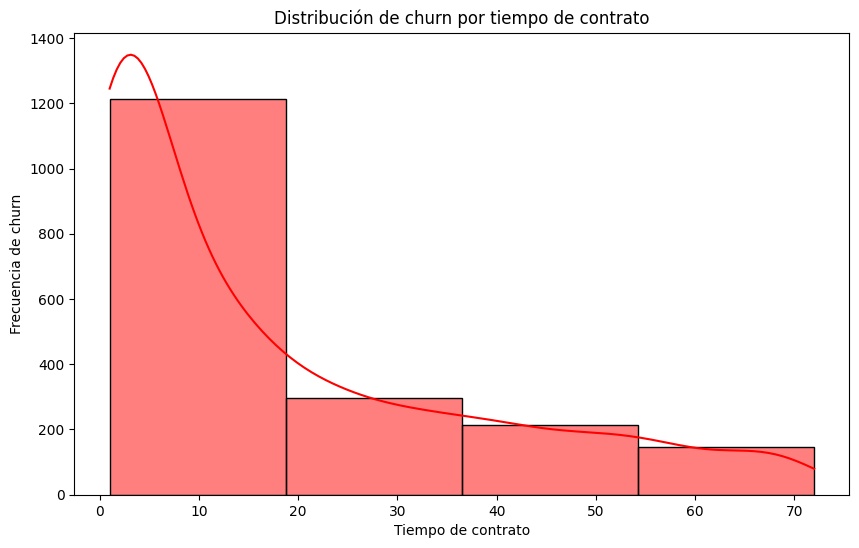

In [ ]:
datos_churn = datos[datos['Churn'] == 1]

bin=ancho_bin(datos_churn,'tenure')
plt.figure(figsize=(10, 6))
sns.histplot(data=datos_churn, x='tenure', kde=True, bins=bin, color='red')
plt.title("Distribución de churn por tiempo de contrato")
plt.xlabel("Tiempo de contrato")
plt.ylabel("Frecuencia de churn")
plt.show()

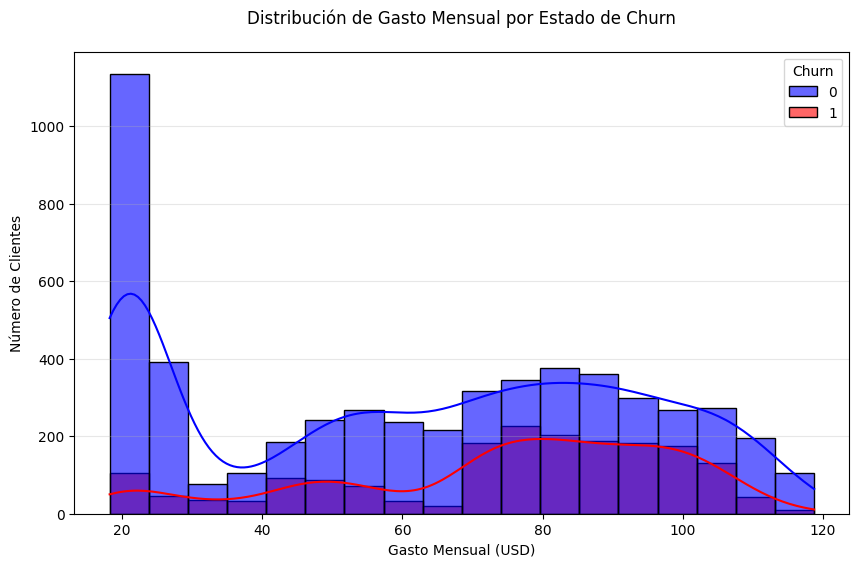

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=datos,
    x='Charges.Monthly',
    hue='Churn',
    kde=True,
    bins='auto',
    palette={0: 'blue', 1: 'red'},
    alpha=0.6,
    multiple='layer'
)
plt.title("Distribución de Gasto Mensual por Estado de Churn", pad=20)
plt.xlabel("Gasto Mensual (USD)")
plt.ylabel("Número de Clientes")
plt.grid(axis='y', alpha=0.3)
plt.show()

/tmp/ipython-input-77474013.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Contract', y='Churn', data=datos, ci=None, palette='viridis')
/tmp/ipython-input-77474013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='Churn', data=datos, ci=None, palette='viridis')


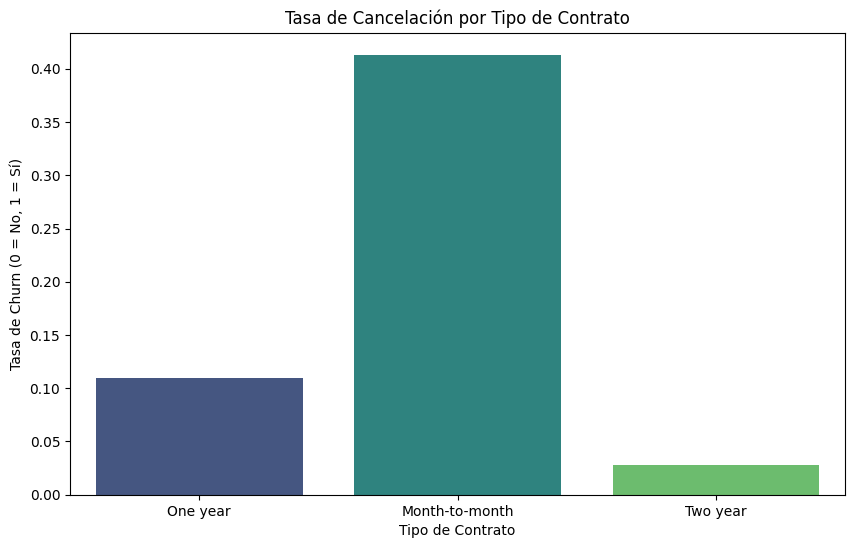

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Contract', y='Churn', data=datos, ci=None, palette='viridis')
plt.title("Tasa de Cancelación por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Tasa de Churn (0 = No, 1 = Sí)")
plt.show()

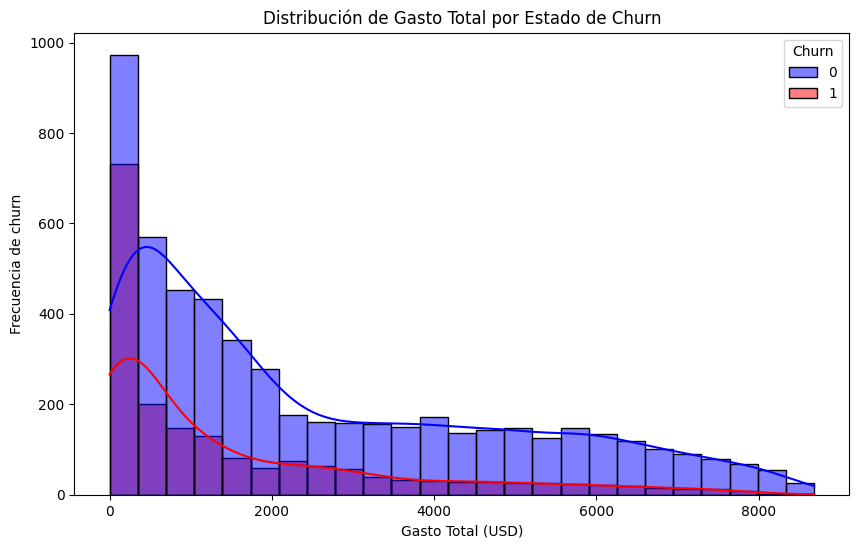

In [ ]:
bin=ancho_bin(datos,'Charges.Total')
plt.figure(figsize=(10, 6))
sns.histplot(data=datos, x='Charges.Total', hue='Churn', kde=True, bins='auto',palette={0: 'blue', 1: 'red'})
plt.title("Distribución de Gasto Total por Estado de Churn")
plt.xlabel("Gasto Total (USD)")
plt.ylabel("Frecuencia de churn")
plt.show()


# 🤖 Modelado Predictivo

# Separacion de datos

In [ ]:
x_over.shape

(10796, 27)

In [ ]:
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y_over)
y

array([0, 0, 1, ..., 1, 1, 1])

# Creacion de modelos

Random Forest Classifier

In [ ]:
x_trainRFC, x_testRFC, y_trainRFC, y_testRFC = train_test_split(x_over, y, test_size=0.2, random_state=42,stratify=y_over)

In [ ]:
modeloRFC = RandomForestClassifier(random_state=42,max_depth=10)
modeloRFC.fit(x_trainRFC, y_trainRFC)
y_pred = modeloRFC.predict(x_testRFC)
modeloRFC.score(x_testRFC, y_testRFC)

0.8611111111111112

Dummy

In [ ]:
x_trainDummy, x_testDummy, y_trainDummy, y_testDummy = train_test_split(x_over, y, test_size=0.2, random_state=42,stratify=y_over)

In [ ]:
baseline=DummyClassifier()
baseline.fit(x_trainDummy, y_trainDummy)


baseline.score(x_testDummy, y_testDummy)

0.5

Decision Tree Clasiffier

In [ ]:
x_trainDTC, x_testDTC, y_trainDTC, y_testDTC = train_test_split(x_over, y, test_size=0.2, random_state=42,stratify=y_over)

In [ ]:
arbol=DecisionTreeClassifier(random_state=42, max_depth=5)
arbol.fit(x_trainDTC, y_trainDTC)

arbol.score(x_testDTC, y_testDTC)

0.788425925925926

In [ ]:
arbol.score(x_trainDTC, y_trainDTC)

0.8070866141732284

Evaluacion de los modelos


---- Rendimiento en TEST de Dummy ----
Accuracy: 0.5000
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1080
           1       0.00      0.00      0.00      1080

    accuracy                           0.50      2160
   macro avg       0.25      0.50      0.33      2160
weighted avg       0.25      0.50      0.33      2160

Matriz de confusión:
 [[1080    0]
 [1080    0]]

---- Rendimiento en TRAIN ----
Accuracy: 0.5000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


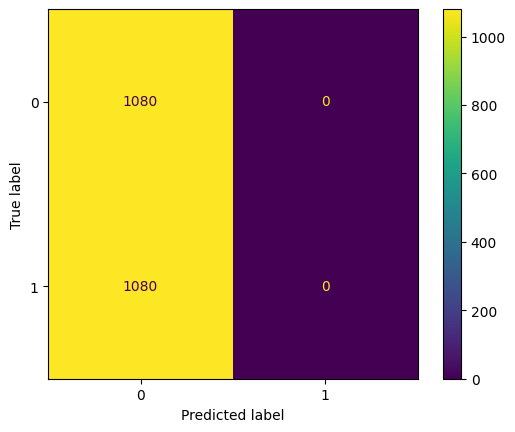

In [ ]:
y_pred_dummy = baseline.predict(x_testDummy)

print("\n---- Rendimiento en TEST de Dummy ----")
print(f"Accuracy: {accuracy_score(y_testDummy, y_pred_dummy):.4f}")
print(classification_report(y_testDummy, y_pred_dummy))
print("Matriz de confusión:\n", confusion_matrix(y_testDummy, y_pred_dummy))

y_pred_train = baseline.predict(x_trainDummy)
print("\n---- Rendimiento en TRAIN ----")
print(f"Accuracy: {accuracy_score(y_trainDummy, y_pred_train):.4f}")
ConfusionMatrixDisplay.from_predictions(y_testDummy,y_pred_dummy)


---- Rendimiento en TEST de Decision Tree Classifier ----
Accuracy: 0.7884
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1080
           1       0.83      0.73      0.78      1080

    accuracy                           0.79      2160
   macro avg       0.79      0.79      0.79      2160
weighted avg       0.79      0.79      0.79      2160

Matriz de confusión:
 [[914 166]
 [291 789]]

---- Rendimiento en TRAIN ----
Accuracy: 0.8071


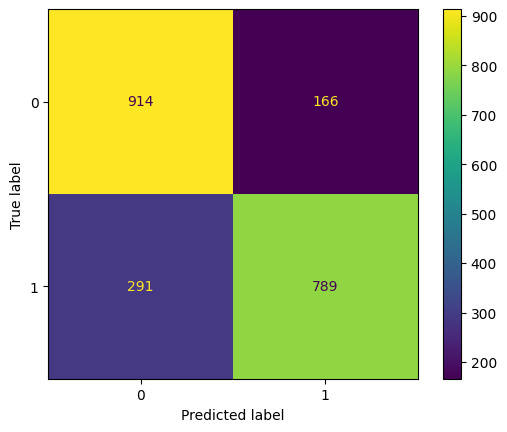

In [ ]:
y_pred_arbol = arbol.predict(x_testDTC)

print("\n---- Rendimiento en TEST de Decision Tree Classifier ----")
print(f"Accuracy: {accuracy_score(y_testDTC, y_pred_arbol):.4f}")
print(classification_report(y_testDTC, y_pred_arbol))
print("Matriz de confusión:\n", confusion_matrix(y_testDTC, y_pred_arbol))

y_pred_train = arbol.predict(x_trainDTC)
print("\n---- Rendimiento en TRAIN ----")
print(f"Accuracy: {accuracy_score(y_trainDTC, y_pred_train):.4f}")
ConfusionMatrixDisplay.from_predictions(y_testDTC,y_pred_arbol)


---- Rendimiento en TEST de Random Forest Classifier ----
Accuracy: 0.8611
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1080
           1       0.85      0.88      0.86      1080

    accuracy                           0.86      2160
   macro avg       0.86      0.86      0.86      2160
weighted avg       0.86      0.86      0.86      2160

Matriz de confusión:
 [[908 172]
 [128 952]]

---- Rendimiento en TRAIN ----
Accuracy: 0.8954


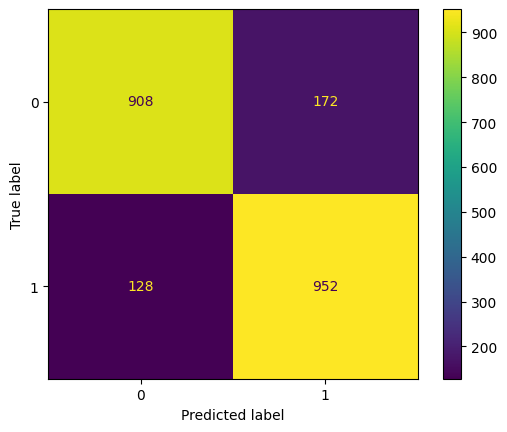

In [ ]:
y_pred = modeloRFC.predict(x_testRFC)

print("\n---- Rendimiento en TEST de Random Forest Classifier ----")
print(f"Accuracy: {accuracy_score(y_testRFC, y_pred):.4f}")
print(classification_report(y_testRFC, y_pred))
print("Matriz de confusión:\n", confusion_matrix(y_testRFC, y_pred))

# Métricas en TRAIN (para diagnosticar overfitting)
y_pred_train = modeloRFC.predict(x_trainRFC)
print("\n---- Rendimiento en TRAIN ----")
print(f"Accuracy: {accuracy_score(y_trainRFC, y_pred_train):.4f}")

ConfusionMatrixDisplay.from_predictions(y_testRFC,y_pred)

¿Cuál modelo tuvo el mejor desempeño?

El Random Forest Classifier fue el modelo con mejor desempeño, con una accuracy en TEST de 0.8611, superior a la del Decision Tree (0.8000) y significativamente mejor que el modelo Dummy (0.5000). También muestra mejores métricas en precisión, recall y f1-score para ambas clases.

¿Algún modelo presentó overfitting o underfitting? Si es así, considera las posibles causas y ajustes:

Dummy Classifier: Underfitting claro.

Accuracy de 0.50 tanto en TRAIN como en TEST, y no predice la clase 1 en absoluto.

Solo sirve como línea base y no captura ninguna relación real en los datos.

Decision Tree Classifier: Ligero riesgo de overfitting, pero controlado.

TRAIN: 0.8125

TEST: 0.8000

→ La diferencia no es grande, lo que sugiere que el árbol no está sobreajustando gravemente.

Random Forest Classifier: Desempeño fuerte y generaliza bien, aunque hay una pequeña brecha:

TRAIN: 0.8969

TEST: 0.8611

→ Esto podría indicar un leve overfitting, pero no alarmante.

Posibles causas y ajustes

Decision Tree:

Si se quiere mejorar sin caer en overfitting, se podría limitar profundidad o usar técnicas como poda.

Random Forest:

Aunque funciona bien, para reducir un poco el overfitting se puede:

Reducir la profundidad máxima de los árboles (max_depth)
Aumentar el número de árboles (n_estimators)
Usar regularización (min_samples_split, min_samples_leaf)

#Interpretación y Conclusiones

- Las variables más relevantes para predecir churn son: tipo de contrato (mes a mes y dos años), tenure, Internet de fibra óptica y método de pago con cheque electrónico.

- Los clientes con contratos mensuales o fibra óptica muestran mayor riesgo de cancelación, mientras que la antigüedad y los contratos largos reducen ese riesgo.

- El modelo Dummy confirmó que el problema no puede resolverse con predicciones aleatorias (accuracy ≈ 50%).

- Decision Tree y Random Forest validaron la importancia de estas variables, apareciendo en los nodos superiores y con alta contribución según la reducción de impureza.

- En conjunto, los análisis estadísticos y predictivos coinciden en que estas variables son decisivas y la selección fue adecuada para explicar y predecir el churn.

Modelo más eficaz: Random Forest, con precisión de 86.11%, mostrando buen equilibrio entre aprendizaje y generalización.

Variables críticas:

Tenure bajo: mayor riesgo de cancelación.

Contratos mensuales: alta propensión al churn; contratos a 2 años reducen abandono.

Cheque electrónico: predictor fuerte de churn.

Fibra óptica: mayor tasa de cancelación, posiblemente por costos o problemas técnicos.

Bajo gasto total y ausencia de servicios extra (seguridad, soporte): ligados a mayor abandono.

Factores principales de churn: baja antigüedad, contratos mensuales, pago con cheque electrónico, servicio de fibra, bajo gasto acumulado y falta de servicios complementarios.

Estrategias de retención recomendadas:

Seguimiento intensivo en los primeros meses con beneficios exclusivos.

Incentivar contratos largos con descuentos o recompensas.

Mejorar la experiencia de clientes de fibra óptica (encuestas, soporte premium).

Migrar a métodos de pago más estables, ofreciendo incentivos.

Promover servicios adicionales (seguridad online, soporte técnico) como valor agregado.

Cierre

El análisis, combinando estadística y modelos de machine learning, identificó patrones clave del churn. El modelo Random Forest confirmó que variables como la duración del contrato, el método de pago y el tipo de contrato son factores altamente predictivos de la cancelación.